In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install ace-tools

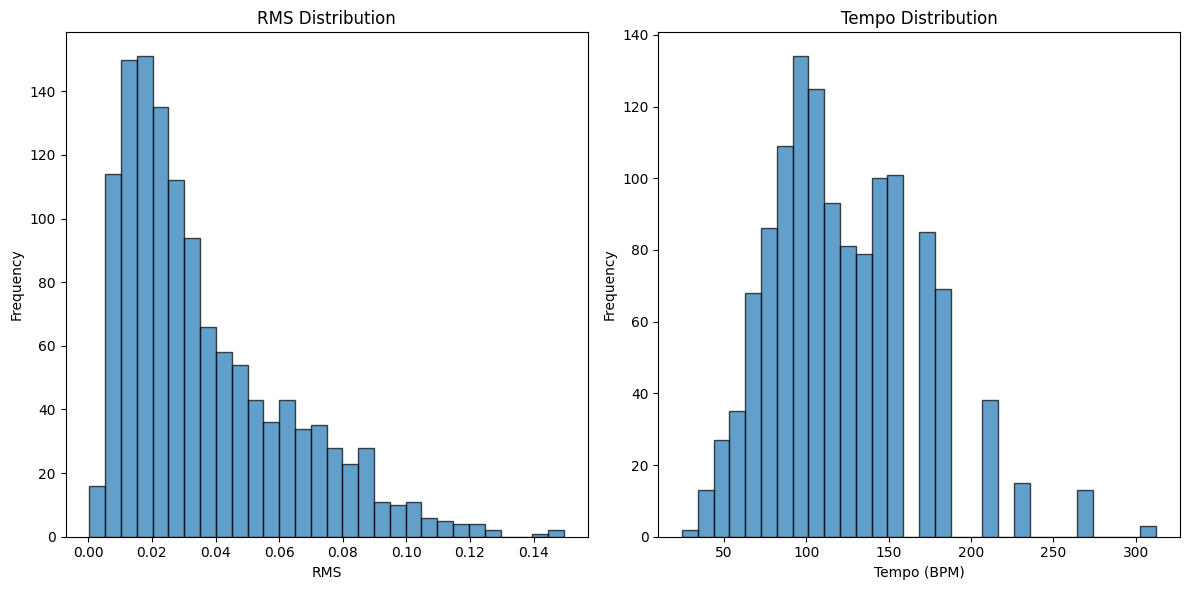

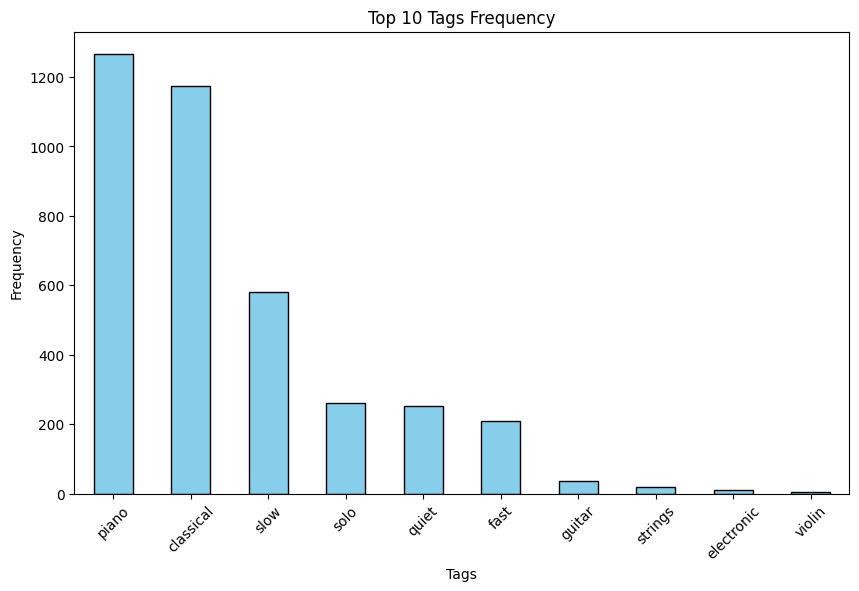

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = '/content/drive/MyDrive/프로젝트/케어크루즈 인턴/data/maestro_v3/processed_musicgen/extended_metadata.csv'
metadata = pd.read_csv(file_path)

# 데이터 프레임의 주요 통계 요약 및 분포 확인
numeric_columns = ['RMS', 'Tempo']
category_columns = ['top_tags', 'tag_list']

# RMS와 Tempo의 기본 통계량 출력
rms_stats = metadata['RMS'].describe()
tempo_stats = metadata['Tempo'].describe()

# RMS와 Tempo의 히스토그램 시각화
plt.figure(figsize=(12, 6))

# RMS 분포
plt.subplot(1, 2, 1)
plt.hist(metadata['RMS'], bins=30, edgecolor='black', alpha=0.7)
plt.title('RMS Distribution')
plt.xlabel('RMS')
plt.ylabel('Frequency')

# Tempo 분포
plt.subplot(1, 2, 2)
plt.hist(metadata['Tempo'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Tempo Distribution')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 카테고리 데이터 시각화를 위한 태그 빈도수 분석
top_tags_series = metadata['Top_Tags'].dropna().str.split(', ').explode()
tag_counts = top_tags_series.value_counts()

# 상위 태그 막대 그래프
plt.figure(figsize=(10, 6))
tag_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Tags Frequency')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



In [7]:
# Remove the erroneous ace_tools import and display statistics directly
# Displaying the descriptive statistics for the metadata
metadata_statistics = metadata.describe()

# Re-show the statistics for the numeric columns
metadata_statistics


,RMS,Tempo
count,1276.000000,1276.000000
mean,0.036535,122.486540
std,0.026177,44.584645
min,0.000336,24.350649
25%,0.016324,89.285714
50%,0.028297,117.187500
75%,0.050734,156.250000
max,0.149517,312.500000


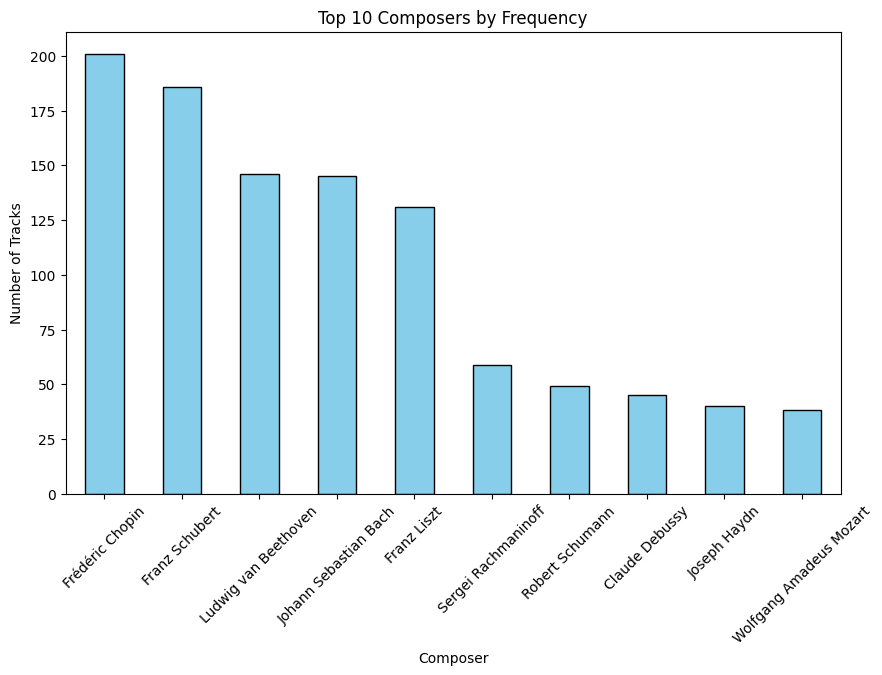

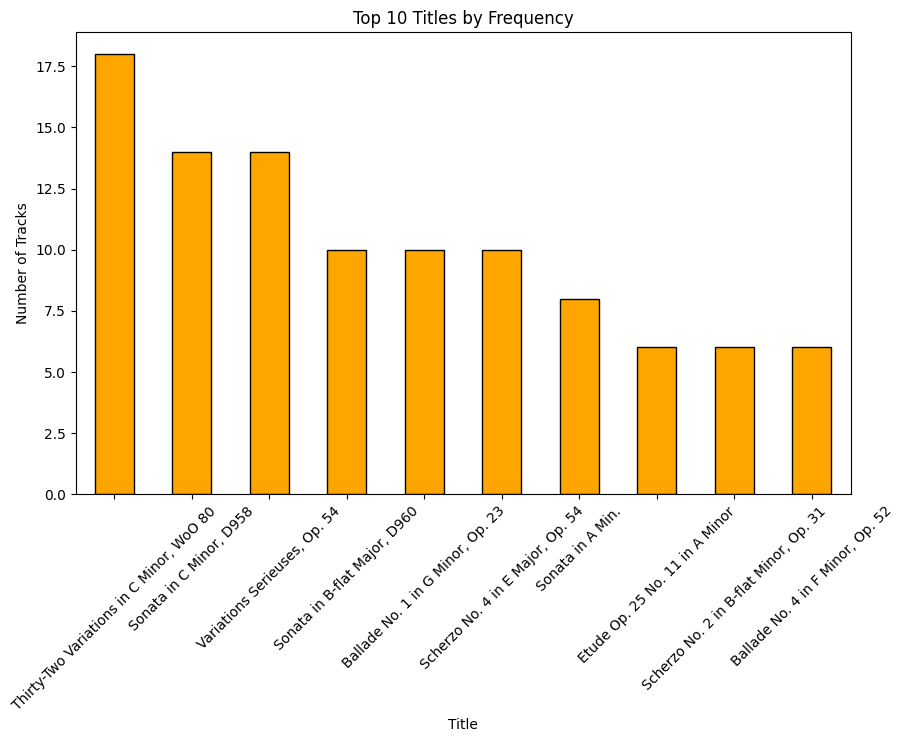

In [11]:
# Extract composer and title from the 'text' column in the dataset
metadata['Composer'] = metadata['text'].str.extract(r'Composer:\s*(.*?),')
metadata['Title'] = metadata['text'].str.extract(r'Title:\s*(.*)')

# Analyze distribution of composers
composer_counts = metadata['Composer'].value_counts()

# Analyze distribution of titles
title_counts = metadata['Title'].value_counts()

# Visualize the top 10 composers
plt.figure(figsize=(10, 6))
composer_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Composers by Frequency')
plt.xlabel('Composer')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

# Visualize the top 10 titles
plt.figure(figsize=(10, 6))
title_counts.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Titles by Frequency')
plt.xlabel('Title')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()



In [12]:
# Save the updated metadata with the new Composer and Title columns to a CSV file
output_file_path = '/content/drive/MyDrive/프로젝트/케어크루즈 인턴/data/maestro_v3/processed_musicgen/extended_metadata_with_composer_and_title.csv'
metadata.to_csv(output_file_path, index=False)



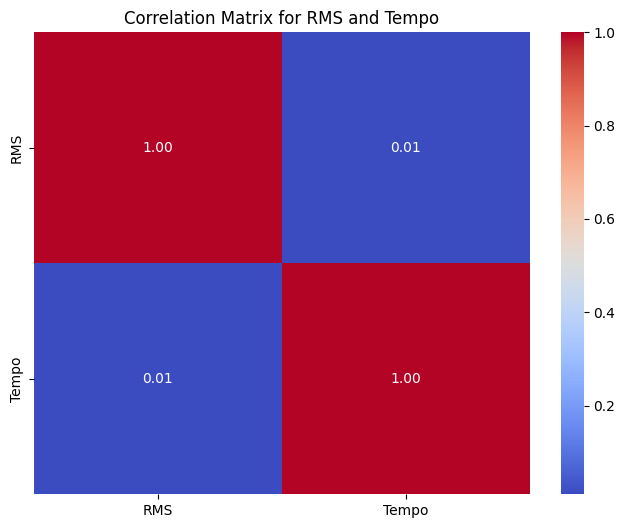

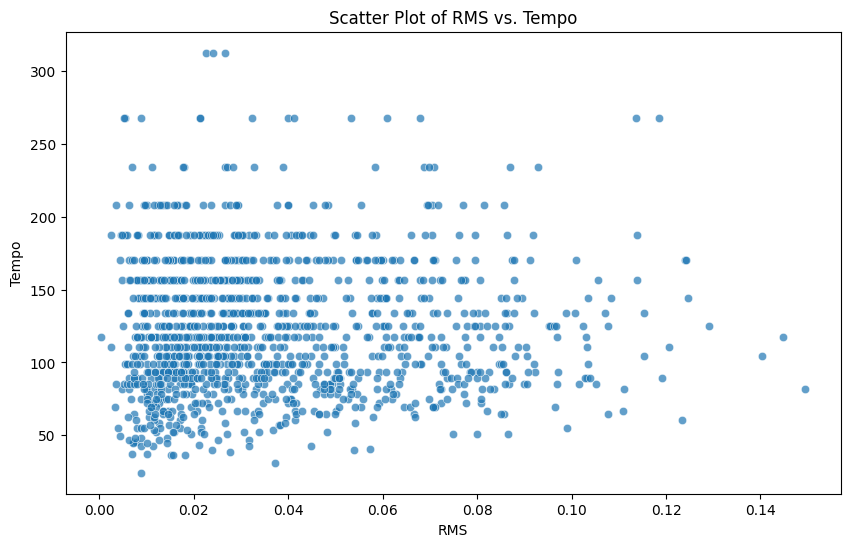

                                   RMS       Tempo
Top_Tags                                          
piano, classical, violin      0.057096  114.583333
piano, classical, fast        0.054345  137.460840
piano, classical, solo        0.054307  125.564245
piano, classical, drums       0.054122   69.444444
guitar, classical, piano      0.046464   98.684211
piano, fast, solo             0.044416  133.928571
piano, guitar, solo           0.041144  117.187500
piano, classical, strings     0.039591  122.288597
piano, slow, classical        0.036388  102.353258
classical, piano, fast        0.034380  100.939699
piano, classical, slow        0.033749  116.605421
classical, piano, strings     0.033240  144.213425
piano, fast, classical        0.032239  181.250000
piano, classical, flute       0.032124  170.454545
fast, piano, classical        0.028766  187.500000
piano, classical, guitar      0.028732  126.697081
classical, strings, guitar    0.028082   98.684211
piano, slow, guitar           0

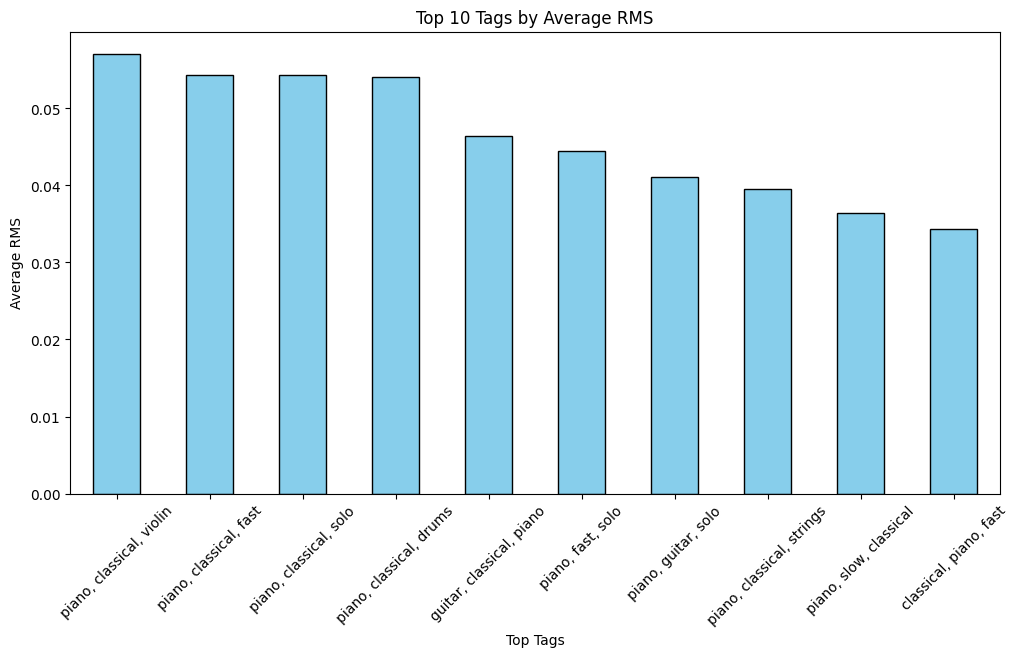

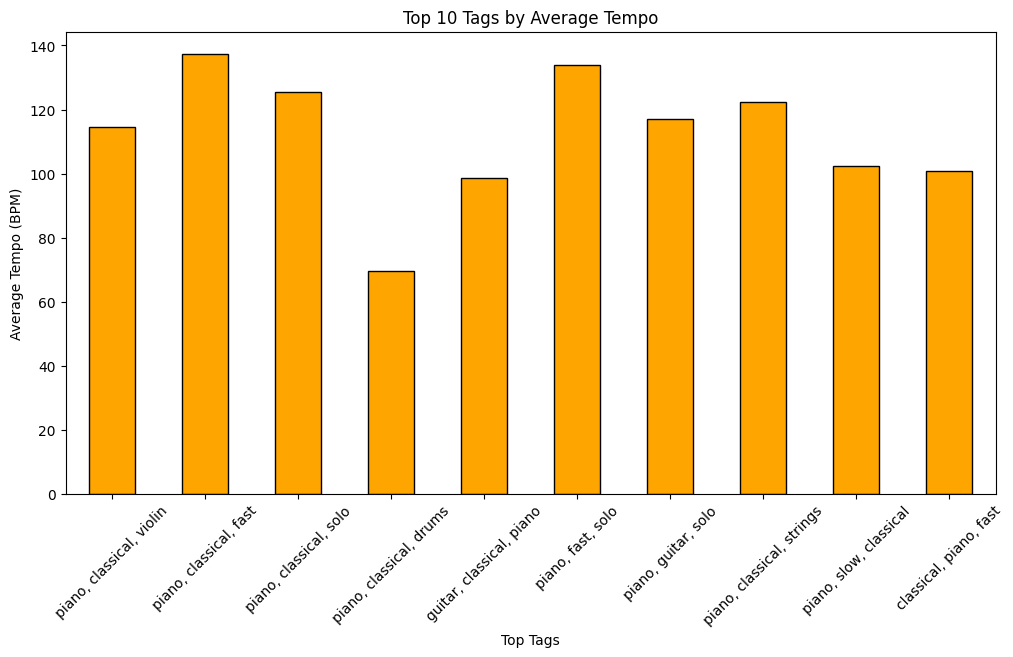

In [17]:
import seaborn as sns

# 수치형 열 선택 (RMS와 Tempo)
numeric_columns = ['RMS', 'Tempo']

# 상관 행렬 계산 (RMS와 Tempo 간의 상관 관계)
correlation_matrix = metadata[numeric_columns].corr()

# 상관 행렬을 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for RMS and Tempo')
plt.show()

# RMS와 Tempo 간의 관계를 산점도로 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=metadata, x='RMS', y='Tempo', alpha=0.7)
plt.title('Scatter Plot of RMS vs. Tempo')
plt.xlabel('RMS')
plt.ylabel('Tempo')
plt.show()

# top_tags별 평균 RMS와 Tempo 계산
if 'Top_Tags' in metadata.columns:
    tag_rms_tempo = metadata.groupby('Top_Tags')[['RMS', 'Tempo']].mean().sort_values(by='RMS', ascending=False)
    print(tag_rms_tempo)
# top_tags별 평균 RMS와 Tempo 시각화
if 'Top_Tags' in metadata.columns:
    # 상위 10개의 태그를 기준으로 평균 RMS와 Tempo 시각화
    top_10_tags = tag_rms_tempo.head(10)

    # RMS 시각화
    plt.figure(figsize=(12, 6))
    top_10_tags['RMS'].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Top 10 Tags by Average RMS')
    plt.xlabel('Top Tags')
    plt.ylabel('Average RMS')
    plt.xticks(rotation=45)
    plt.show()

    # Tempo 시각화
    plt.figure(figsize=(12, 6))
    top_10_tags['Tempo'].plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Top 10 Tags by Average Tempo')
    plt.xlabel('Top Tags')
    plt.ylabel('Average Tempo (BPM)')
    plt.xticks(rotation=45)
    plt.show()


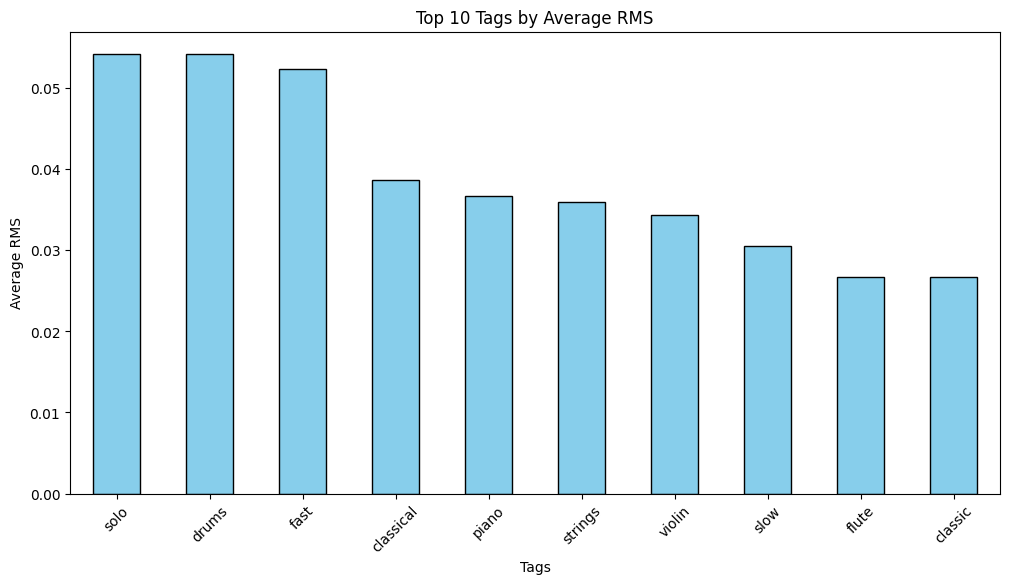

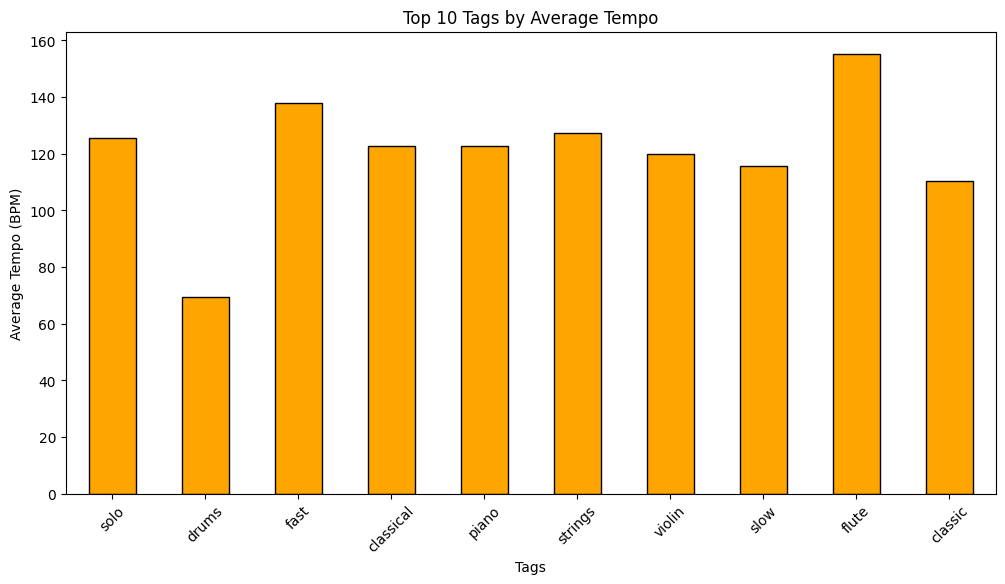

In [20]:
# top_tags를 ','로 분리하고 각 태그를 행으로 펼치기
if 'Top_Tags' in metadata.columns:
    exploded_tags = metadata.dropna(subset=['Top_Tags'])
    exploded_tags = exploded_tags.assign(Top_Tags=exploded_tags['Top_Tags'].str.split(', '))
    exploded_tags = exploded_tags.explode('Top_Tags')

    # 태그별 RMS와 Tempo 평균 계산
    tag_rms_tempo = exploded_tags.groupby('Top_Tags')[['RMS', 'Tempo']].mean().sort_values(by='RMS', ascending=False)

    # 상위 10개의 태그 기준으로 평균 RMS 시각화
    plt.figure(figsize=(12, 6))
    tag_rms_tempo['RMS'].head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Top 10 Tags by Average RMS')
    plt.xlabel('Tags')
    plt.ylabel('Average RMS')
    plt.xticks(rotation=45)
    plt.show()

    # 상위 10개의 태그 기준으로 평균 Tempo 시각화
    plt.figure(figsize=(12, 6))
    tag_rms_tempo['Tempo'].head(10).plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Top 10 Tags by Average Tempo')
    plt.xlabel('Tags')
    plt.ylabel('Average Tempo (BPM)')
    plt.xticks(rotation=45)
    plt.show()


In [21]:
# top_tags를 ','로 분리하고 각 태그를 행으로 펼치기
if 'Tags_List' in metadata.columns:
    exploded_tags = metadata.dropna(subset=['Tags_List'])
    exploded_tags = exploded_tags.assign(Tags_List=exploded_tags['Tags_List'].str.split(', '))
    exploded_tags = exploded_tags.explode('Tags_List')

    # 고유 태그 리스트를 추출
    unique_tags = exploded_tags['Tags_List'].unique()

    # 모든 태그를 프린트
    for tag in unique_tags:
        print(tag)


guitar
classical
slow
techno
strings
drums
electronic
rock
fast
piano
ambient
beat
violin
vocal
synth
female
indian
opera
male
singing
vocals
no vocals
harpsichord
loud
quiet
flute
woman
male vocal
no vocal
pop
soft
sitar
solo
man
classic
choir
voice
new age
dance
male voice
female vocal
beats
harp
cello
no voice
weird
country
metal
female voice
choral


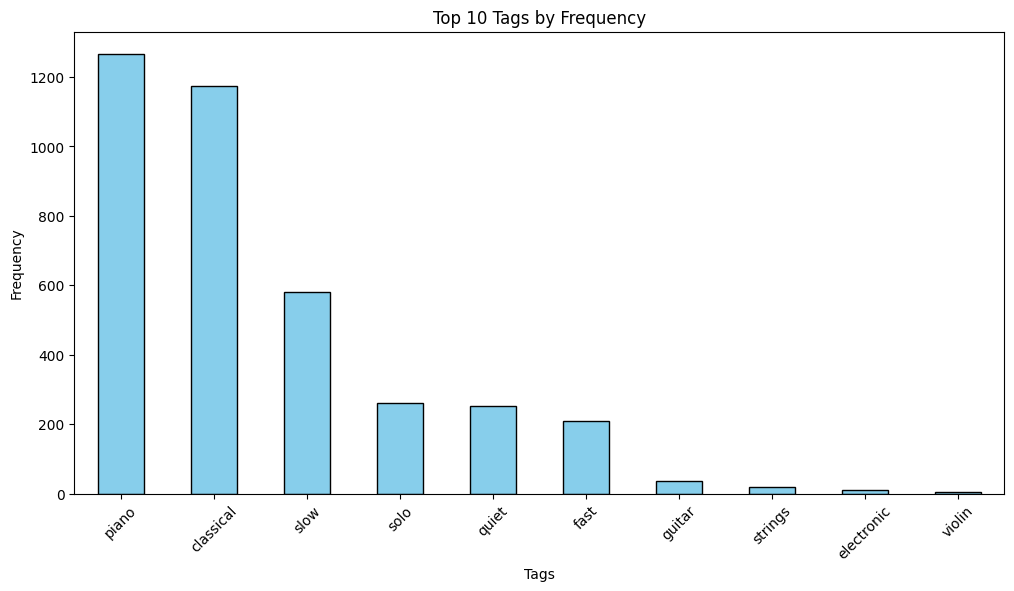

In [25]:
# Top_Tags를 ','로 분리하고 각 태그를 행으로 펼치기
if 'Top_Tags' in metadata.columns:
    exploded_tags = metadata.dropna(subset=['Top_Tags'])
    exploded_tags = exploded_tags.assign(Top_Tags=exploded_tags['Top_Tags'].str.split(', '))
    exploded_tags = exploded_tags.explode('Top_Tags')

    # 각 태그의 빈도수를 계산
    tag_counts = exploded_tags['Top_Tags'].value_counts()

    # 상위 10개의 태그를 시각화
    plt.figure(figsize=(12, 6))
    tag_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Top 10 Tags by Frequency')
    plt.xlabel('Tags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # 전체 태그 빈도 데이터프레임 생성 및 표시
    tag_counts_df = tag_counts.reset_index()
    tag_counts_df.columns = ['Tag', 'Frequency']


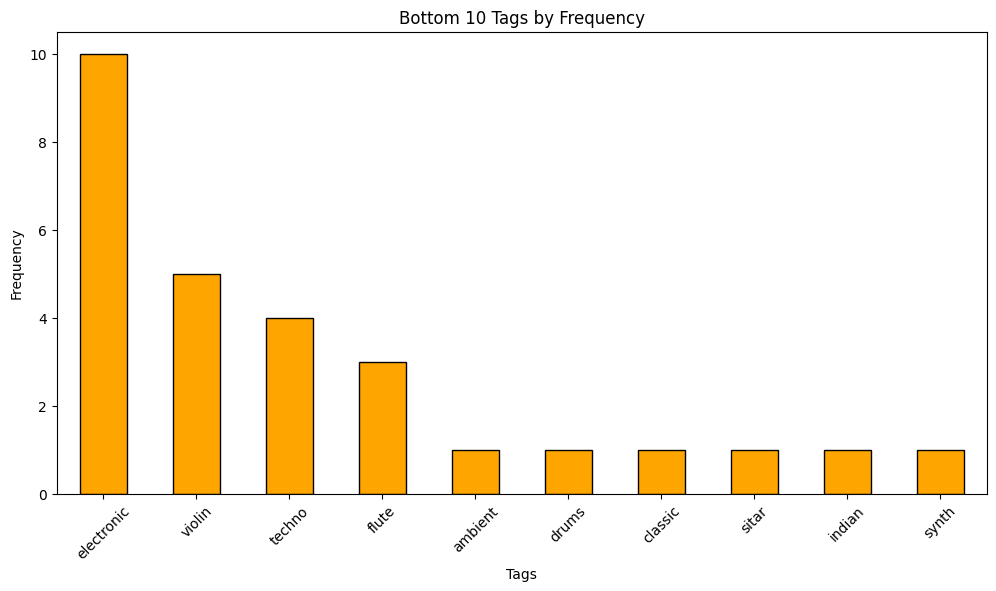

In [26]:
# 하위 10개의 태그를 시각화
if 'Top_Tags' in metadata.columns:
    plt.figure(figsize=(12, 6))
    tag_counts.tail(10).plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Bottom 10 Tags by Frequency')
    plt.xlabel('Tags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


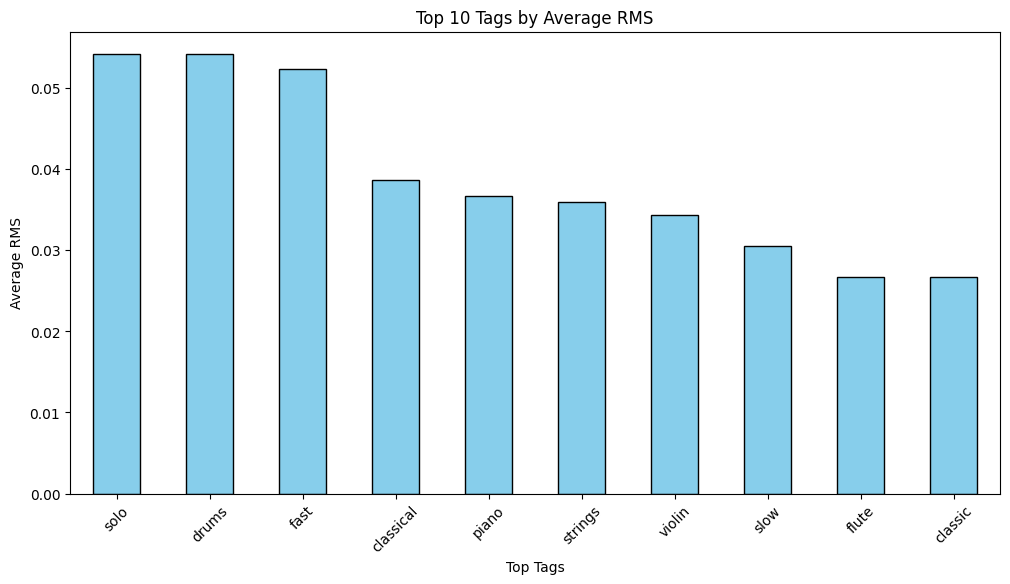

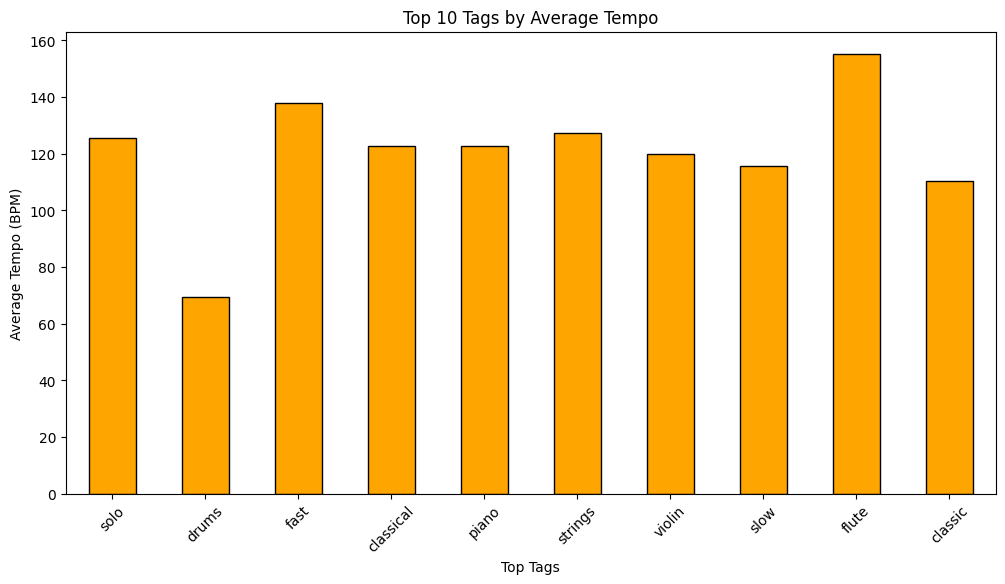

In [28]:
# 모든 Top_Tags의 태그에 대해 RMS와 Tempo 분석
if 'Top_Tags' in metadata.columns:
    # Top_Tags를 ','로 분리하고 각 태그를 행으로 펼치기
    exploded_top_tags = metadata.dropna(subset=['Top_Tags'])
    exploded_top_tags = exploded_top_tags.assign(Top_Tags=exploded_top_tags['Top_Tags'].str.split(', '))
    exploded_top_tags = exploded_top_tags.explode('Top_Tags')

    # 각 태그별 RMS와 Tempo 평균 계산
    top_tags_rms_tempo = exploded_top_tags.groupby('Top_Tags')[['RMS', 'Tempo']].mean()


    # 시각화를 위해 상위 10개의 태그만 선택
    top_10_tags = top_tags_rms_tempo.sort_values(by='RMS', ascending=False).head(10)

    # 상위 10개 태그의 RMS 시각화
    plt.figure(figsize=(12, 6))
    top_10_tags['RMS'].plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Top 10 Tags by Average RMS')
    plt.xlabel('Top Tags')
    plt.ylabel('Average RMS')
    plt.xticks(rotation=45)
    plt.show()

    # 상위 10개 태그의 Tempo 시각화
    plt.figure(figsize=(12, 6))
    top_10_tags['Tempo'].plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Top 10 Tags by Average Tempo')
    plt.xlabel('Top Tags')
    plt.ylabel('Average Tempo (BPM)')
    plt.xticks(rotation=45)
    plt.show()


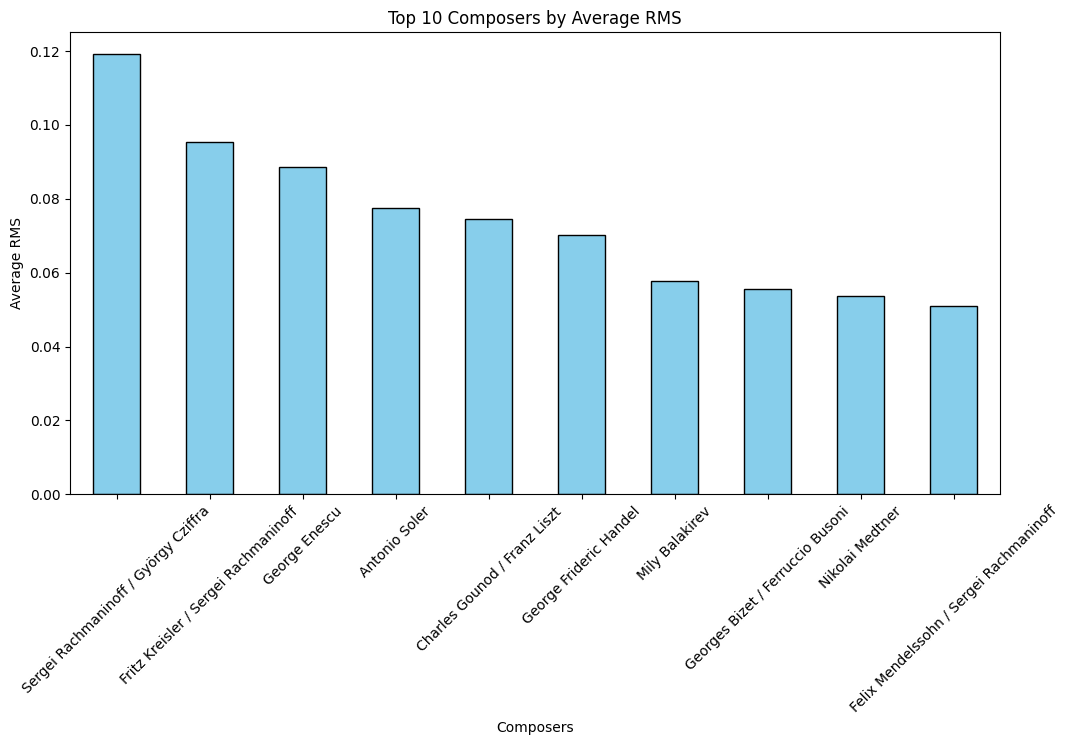

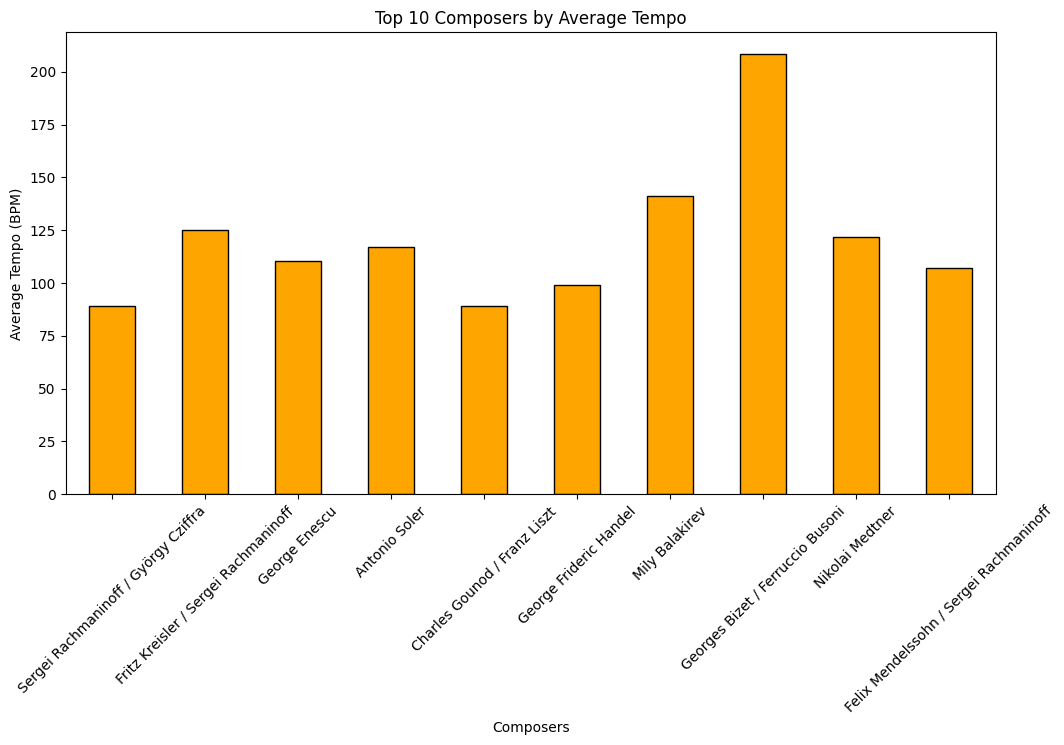

In [30]:
# 파일을 불러와 Composer 컬럼을 기준으로 RMS와 Tempo 분석
file_path = "/content/drive/MyDrive/프로젝트/케어크루즈 인턴/data/maestro_v3/processed_musicgen/extended_metadata_with_composer_and_title.csv"

# 데이터 불러오기
composer_metadata = pd.read_csv(file_path)

# 작곡가별 RMS와 Tempo 평균 계산
if 'Composer' in composer_metadata.columns:
    composer_rms_tempo = composer_metadata.groupby('Composer')[['RMS', 'Tempo']].mean().sort_values(by='RMS', ascending=False)


    # 상위 10명 작곡가의 RMS 시각화
    plt.figure(figsize=(12, 6))
    composer_rms_tempo['RMS'].head(10).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Top 10 Composers by Average RMS')
    plt.xlabel('Composers')
    plt.ylabel('Average RMS')
    plt.xticks(rotation=45)
    plt.show()

    # 상위 10명 작곡가의 Tempo 시각화
    plt.figure(figsize=(12, 6))
    composer_rms_tempo['Tempo'].head(10).plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Top 10 Composers by Average Tempo')
    plt.xlabel('Composers')
    plt.ylabel('Average Tempo (BPM)')
    plt.xticks(rotation=45)
    plt.show()


In [31]:
# 데이터의 결측치를 확인하는 코드

# 각 열의 결측치 개수 확인
missing_data = metadata.isnull().sum()

# 결측치가 있는 열만 추출
missing_data = missing_data[missing_data > 0]

# 결측치 결과 출력
print("Columns with missing values and their counts:")
print(missing_data)


Columns with missing values and their counts:
Series([], dtype: int64)


In [32]:
!pip install python-dotenv

In [ ]:
import openai
import pandas as pd

# OpenAI API 키 설정
openai.api_key = "your_openai_api_key_here"

# 데이터 로드
data_path = "/content/drive/MyDrive/프로젝트/케어크루즈 인턴/data/maestro_v3/processed_musicgen/extended_metadata_with_composer_and_title.csv"
metadata = pd.read_csv(data_path)

# 프롬프트 생성 함수
def generate_prompt(composer, title, tags, description):
    tag_list = tags.split(', ')  # 태그 분리
    formatted_tags = "; ".join(tag_list)  # 세미콜론으로 포맷팅
    prompt = (
        f"Compose a piece of music inspired by the work of {composer}, specifically the composition titled '{title}'. "
        f"This music should reflect the following characteristics: {formatted_tags}. "
        f"It is intended as a soothing, instrumental piece ideal for sleep music, with no lyrics or vocal elements. "
        f"Description: {description} "
        f"(e.g., RMS: {description.split(', ')[0].split(': ')[1]}, Tempo: {description.split(', ')[1].split(': ')[1]} BPM)."
    )
    return prompt

# 프롬프트 생성 및 새로운 컬럼 추가
def create_prompts_for_metadata(metadata):
    prompts = []

    for _, row in metadata.iterrows():
        composer = row.get('Composer', 'Unknown Composer')
        title = row.get('Title', 'Untitled')
        tags = row.get('Top_Tags', 'No Tags')
        description = f"RMS: {row['RMS']}, Tempo: {row['Tempo']}"

        prompt = generate_prompt(composer, title, tags, description)
        prompts.append(prompt)

    metadata['Prompt'] = prompts
    return metadata

# 프롬프트 생성
metadata_with_prompts = create_prompts_for_metadata(metadata)

# 결과를 CSV로 저장
output_path = "/content/drive/MyDrive/프로젝트/케어크루즈 인턴/data/maestro_v3/processed_musicgen/metadata_with_prompts.csv"
metadata_with_prompts.to_csv(output_path, index=False)

print(f"Metadata with prompts has been saved to {output_path}")
